In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from mpl_toolkits.axes_grid1 import ImageGrid
from torchvision.utils import save_image, make_grid

/Library/Python/3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Python/3.7/site-packages/urllib3/__init__.py:38: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  exceptions.NotOpenSSLWarning,


In [2]:
# create a transofrm to apply to each datapoint
transform = transforms.Compose([transforms.ToTensor()])

# download the MNIST datasets
path = './datasets'
train_dataset = MNIST(path, transform=transform, download=True)
test_dataset  = MNIST(path, transform=transform, download=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# create train and test dataloaders
batch_size = 128
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

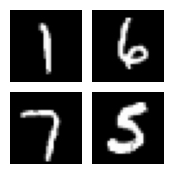

In [4]:
# get 25 sample training images for visualization
image = next(iter(train_loader))

num_samples = 4
width = int(num_samples**0.5)
sample_images = [image[0][i,0] for i in range(num_samples)] 

fig = plt.figure(figsize=(width, width))
grid = ImageGrid(fig, 111, nrows_ncols=(width, width), axes_pad=0.1)

for ax, im in zip(grid, sample_images):
    ax.imshow(im, cmap='gray')
    ax.axis('off')

plt.show()

In [5]:
from vq_vae import train_model

In [6]:
vqvae_model = train_model(train_loader=train_loader, num_epochs=15, learning_rate=2e-4, codebook_size=4, codebook_embedding_dim=2)

Epoch: 1/15, Batch: 0, Total loss: 0.74, Recon loss: 0.46, Codebook loss: 0.23, Commitment loss: 0.23
Epoch: 1/15, Batch: 100, Total loss: 0.29, Recon loss: 0.11, Codebook loss: 0.15, Commitment loss: 0.15
Epoch: 1/15, Batch: 200, Total loss: 0.20, Recon loss: 0.07, Codebook loss: 0.11, Commitment loss: 0.11
Epoch: 1/15, Batch: 300, Total loss: 0.15, Recon loss: 0.05, Codebook loss: 0.08, Commitment loss: 0.08
Epoch: 1/15, Batch: 400, Total loss: 0.12, Recon loss: 0.05, Codebook loss: 0.06, Commitment loss: 0.06
Epoch: 1/15, Total loss: 0.11, Recon loss: 0.05, Codebook loss: 0.05, Commitment loss: 0.05
Epoch: 2/15, Batch: 0, Total loss: 0.11, Recon loss: 0.04, Codebook loss: 0.05, Commitment loss: 0.05
Epoch: 2/15, Batch: 100, Total loss: 0.10, Recon loss: 0.04, Codebook loss: 0.05, Commitment loss: 0.05
Epoch: 2/15, Batch: 200, Total loss: 0.10, Recon loss: 0.04, Codebook loss: 0.05, Commitment loss: 0.05
Epoch: 2/15, Batch: 300, Total loss: 0.10, Recon loss: 0.04, Codebook loss: 0.05

In [18]:
import random

torch.Size([1, 1, 32, 32])


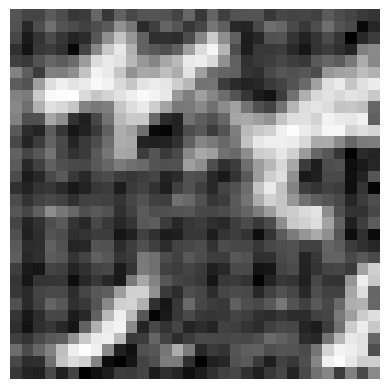

None


In [54]:
# random recon
def random_generate(codebook_size):
    z_idxes = torch.tensor([random.choice([0,1,2,3]) for _ in range(64)], dtype=torch.int32)
    z_embeddings = vqvae_model.embedding(z_idxes)
    z_embeddings = z_embeddings.reshape([1,8,8,2]).permute(0,3,1,2)
    x_decoded = vqvae_model.decode(z_embeddings)
    print(x_decoded.shape)
    digit = x_decoded.detach().cpu().reshape(32, 32) # reshape vector to 2d array
    plt.imshow(digit, cmap='gray')
    plt.axis('off')
    plt.show()

for i in range(1):
    print(random_generate(codebook_size=4))

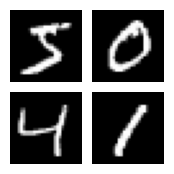

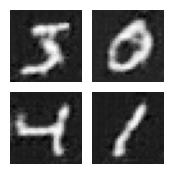

In [78]:
# Reconstruction
def generate():
    num_samples = 4
    image = next(iter(test_loader))
    width = int(num_samples**0.5)
    sample_images = torch.Tensor([image[0][i,0].numpy() for i in range(num_samples)])

    # print origin images
    fig = plt.figure(figsize=(width, width))
    grid = ImageGrid(fig, 111, nrows_ncols=(width, width), axes_pad=0.1)
    for ax, im in zip(grid, sample_images):
        ax.imshow(im, cmap='gray')
        ax.axis('off')

    sample_images = sample_images[:,None,:,:]
    quant_input = vqvae_model.encode(sample_images)
    quant_out, _, _, _ = vqvae_model.vector_quantize(quant_input)
    recon_images = vqvae_model.decode(quant_out)
    recon_images = recon_images.detach().cpu().reshape(num_samples, 28, 28) # reshape vector to 2d array

    # print recon images
    fig = plt.figure(figsize=(width, width))
    grid = ImageGrid(fig, 111, nrows_ncols=(width, width), axes_pad=0.1)
    for ax, im in zip(grid, recon_images):
        ax.imshow(im, cmap='gray')
        ax.axis('off')

    plt.show()

generate()